# Checklist de base

Analyse de forme :

    Variable target : cancer_ytrain et cancer_ytest
    Lignes et colonnes : cancer_xtrain (144, 16063)
    Types de variables : 16063 variables quantitatives
    Analyse des valeurs manquantes : Aucun Nan

Analyse de fond :

    Visualisation de la target : la variable target contient 14 valeurs distinctes qui semble globalement équilibrées à quelques classes près
    Relation variables /target :


In [99]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, learning_curve

from sklearn.metrics import accuracy_score # pour voir l'efficacité globale du modèle
from sklearn.metrics import recall_score # pour voir le poids des Faux negatifs
from sklearn.metrics import precision_score # pour voir le poids des faux positifs
from sklearn.metrics import f1_score # rapport de la moyenne géométrique au carré et de la moyenne aritmétique entre le recall et la précision
from sklearn.metrics import confusion_matrix #matrice qui nous donne les erreurs de classification
from sklearn.metrics import classification_report 


from sklearn.preprocessing import StandardScaler

path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP2/donnees_en_point_csv'

cancer_ytest = pd.read_csv(os.path.join(path,'cancer_ytest.csv'), sep=',')
cancer_ytrain = pd.read_csv(os.path.join(path,'cancer_ytrain.csv'), sep=',')
cancer_xtest = pd.read_csv(os.path.join(path,'cancer_xtest.csv'), sep=',')
cancer_xtrain = pd.read_csv(os.path.join(path,'cancer_xtrain.csv'), sep=',')

In [128]:
#Fonctions utiles à l'évaluation d'un modèle

def evaluation(model,xtrain,xtest,ytrain,ytest,average = 'weighted',display=True):
    ytrain = ytrain.values.ravel()
    ytest = ytest.values.ravel()
    
    model.fit(xtrain,ytrain)

    # Faire des prédictions
    predictions1 = model.predict(xtrain)
    predictions2 = model.predict(xtest)

    print(classification_report(predictions2,ytest))


    if display:
        conf_matrix = confusion_matrix(predictions2,ytest)
        # Création de la heatmap avec Seaborn
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='g',cmap='Blues') #fmt='g' sert à éviter l'affichage scientifique des nombres
        #plt.colormaps() pour avoir d'autres couleurs de cmap
        plt.xlabel('Prédictions')
        plt.ylabel('Valeurs Réelles')
        plt.title('Matrice de Confusion pour les valeurs tests')
        plt.show()
    
        
       

Text(0.5, 1.0, 'Répartition des cancers, target test')

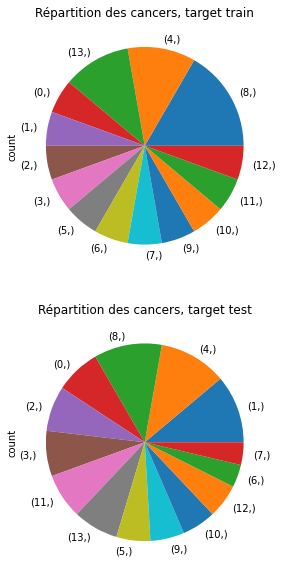

In [88]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
cancer_ytrain.value_counts().plot.pie()
plt.title("Répartition des cancers, target train")
plt.subplot(2,1,2)
cancer_ytest.value_counts().plot.pie()
plt.title("Répartition des cancers, target test")

# Modélisation sur des modèles simples

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.50      0.43      0.46         7
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       0.83      1.00      0.91         5
           5       0.67      0.29      0.40         7
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         2
           8       0.50      0.75      0.60         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.33      1.00      0.50         1
          13       1.00      0.67      0.80         6

    accuracy                           0.52        54
   macro avg       0.49      0.51      0.47        54
weighted avg       0.58      0.52      0.53        54



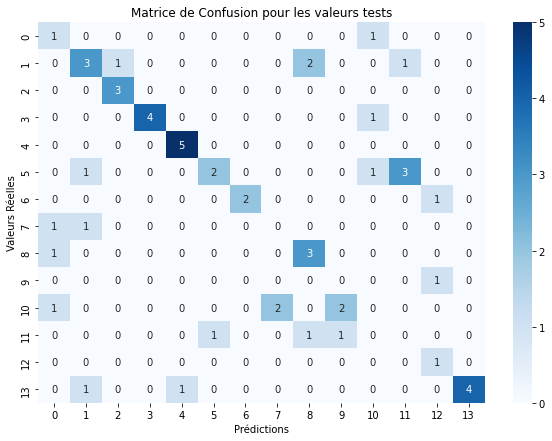

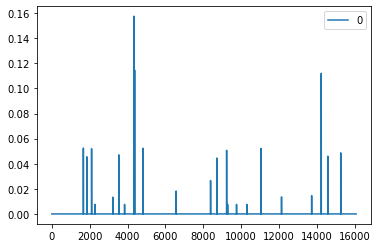

In [116]:
# Modèle 1
model = DecisionTreeClassifier()
evaluation(model,cancer_xtrain,cancer_xtest,cancer_ytrain,cancer_ytest,average = 'weighted',display=True)
df = pd.DataFrame(model.feature_importances_,index=cancer_xtrain.columns).plot()

/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         3
           2       0.50      0.67      0.57         3
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8
           5       0.33      0.17      0.22         6
           6       0.50      0.25      0.33         4
           7       0.50      0.20      0.29         5
           8       0.83      1.00      0.91         5
           9       0.00      0.00      0.00         0
          10       0.33      0.50      0.40         2
          11       0.50      1.00      0.67         2
          12       1.00      0.75      0.86         4
          13       1.00      0.80      0.89         5

    accuracy                           0.61        54
   macro avg       0.57      0.56      0.54        54
weighted avg       0.69      0.61      0.62        54



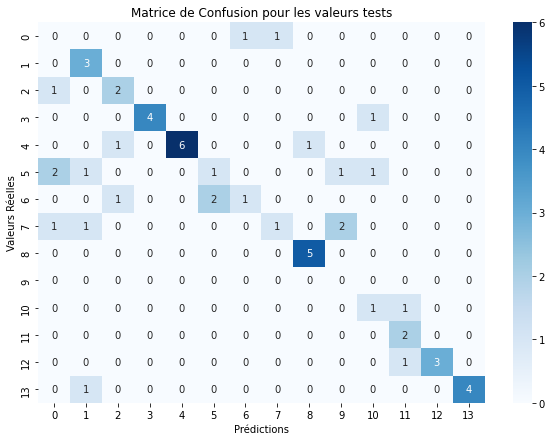

In [150]:
#Random forest
model = RandomForestClassifier(n_estimators=500)
evaluation(model,cancer_xtrain,cancer_xtest,cancer_ytrain,cancer_ytest,average = 'weighted',display=True)
df = pd.DataFrame(model.feature_importances_,index=cancer_xtrain.columns)

/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 0
- 1
- 10
- 100
- 1000
- ...


# Pipeline avec data engenering

In [144]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif #Permet de faire un choix de variables avec un test de anova 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [145]:
model = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10),RandomForestClassifier(random_state=0))
evaluation(model,cancer_xtrain,cancer_xtest,cancer_ytrain,cancer_ytest,average = 'weighted',display=True)


MemoryError: Unable to allocate 138. GiB for an array with shape (144, 129034080) and data type float64

In [80]:
clf.feature_importances_[clf.feature_importances_>0.02].shape

(14,)

array([0.00201382, 0.00458245, 0.00385051, 0.00239126, 0.00216055,
       0.00304194, 0.00228473, 0.00254871, 0.00220494, 0.0023029 ,
       0.00216238, 0.003147  , 0.00212558, 0.00393312, 0.00242961,
       0.00215801, 0.00278145, 0.00525482, 0.00201692, 0.00363914,
       0.00206214, 0.00313996, 0.0032308 , 0.00390474, 0.00215575,
       0.00308367, 0.00233435, 0.0020481 , 0.00269919, 0.00217753,
       0.00219493, 0.00211975, 0.0022159 , 0.00224563, 0.00247305,
       0.00244959, 0.00242681, 0.00270166])

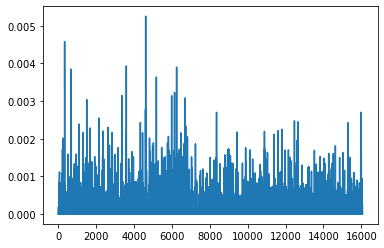

In [72]:
plt.plot(clf_rf.feature_importances_)

clf_rf.feature_importances_[clf_rf.feature_importances_>0.002]


In [40]:
clf_rf.feature_importances_.argsort()

features_names = cancer_xtrain.columns 

features_names[clf_rf.feature_importances_.argsort()]

Index(['0', '10278', '10279', '10280', '10281', '10282', '10283', '10285',
       '10286', '10287',
       ...
       '3364', '2102', '5228', '15403', '2732', '4370', '6471', '3146', '3908',
       '6087'],
      dtype='object', length=16063)

In [ ]:

def features(model,xtrain,ytrain, display1=True,display2=True): 
    features_names = xtrain.columns 
    features_importantes = model.feature_importances_
    index = features_importantes.argsort()[::-1]